In [ ]:
using LinearAlgebra
using Plots

## 課題2.2(一部必須)

### 2.2.1(必須)

In [1]:
# x's recurrence relation
function xrecur(A, x0, b)
    n = size(b)[1]
    x1 = zeros(n)
    for i = 1:n
        x1[i] = b[i]
        for j = 1:n
            x1[i] -= (j != i ? A[i,j]*x0[j] : 0.)
        end
        x1[i] /= A[i,i]
    end
    return x1
end


# Jacobi method
function jacobi(A, x0, b)
    #init
    x1 = x0
    for i=1:150
        x1 = xrecur(A, x0, b)
        if sum(abs, x1 - x0) < 1e-9
            break
        else
            x0 = x1
        end
    end
    return x1
end


# main
function main()   
    A = [3. 1. 1.
         1. 3. 1. 
         1. 1. 3.]
    b = [0.; 4.; 6.]
    x0 = zeros(size(b)[1])

    println("A=", A)
    println("b=", b)
    println("x=", jacobi(A, x0, b))
end


main()

A=[3.0 1.0 1.0; 1.0 3.0 1.0; 1.0 1.0 3.0]
b=[0.0, 4.0, 6.0]
x=[-1.0, 1.0, 2.0]


### 2.2.2

In [3]:
gr(ylabel="element", ms=2, legend=false)


# x calculation
function xrecur(A, x0, b)
    n = size(b)[1]
    x1 = zeros(n)
    for i = 1:n
        x1[i] = b[i]
        for j = 1:n
            x1[i] -= (j != i ? A[i,j]*x0[j] : 0.)
        end
        x1[i] /= A[i,i]
    end
    return x1
end


# Jacobi method and put out animation gif
function jacobianim(A, x0, b, filename)
    #init
    x1 = x0
    anim = @animate for i=1:150
        x1 = xrecur(A, x0, b)
        if sum(abs, x1 - x0) < 1e-7
            break
        else
            x0 = x1
        end
        scatter(x1, title=filename)
    end
    gif(anim, "img/2-2_$(filename).gif", fps = 10)
    return x1
end


# A matrix
function amtx(n, a)
    mtx = Array(SymTridiagonal(fill(1., n), fill(a, n-1)))
    mtx[1,n] = mtx[n,1] = a
    return mtx
end


# B vector
function bvec(n)
    vec = zeros(n)
    vec[1] = 1
    vec[n] = -1
    return vec
end


# main
function main()
    n = 50
    A1 = amtx(n, -1/4)
    A2 = amtx(n, -3/4)
    b = bvec(n)
    
    println("x=", jacobianim(A1, zeros(n), b, "x0=zeros a=-0.25"))
    println("x=", jacobianim(A2, zeros(n), b, "x0=zeros a=-0.75"))
    println("x=", jacobianim(A1, 1e3*rand(n), b, "x0=rand a=-0.25"))
    println("x=", jacobianim(A2, 1e2*rand(n), b, "x0=rand a=-0.75"))
end

main()

x=

┌ Info: Saved animation to 
│   fn = /Users/5ebec/computational-methods-and-exercise-in-eee/work2/img/2-2_x0=zeros a=-0.25.gif
└ @ Plots /Users/5ebec/.julia/packages/Plots/cDXot/src/animation.jl:90


[0.845299, 0.226497, 0.0606898, 0.0162618, 0.00435733, 0.00116754, 0.000312841, 8.38261e-5, 2.24605e-5, 6.01855e-6, 1.61232e-6, 4.32139e-7, 1.15646e-7, 3.10281e-8, 8.26228e-9, 2.22552e-9, 5.81379e-10, 1.58417e-10, 3.90123e-11, 1.09104e-11, 2.31992e-12, 6.78568e-13, 1.05693e-13, 3.28626e-14, 1.77636e-15, -1.77636e-15, -3.28626e-14, -1.05693e-13, -6.78568e-13, -2.31992e-12, -1.09104e-11, -3.90123e-11, -1.58417e-10, -5.81379e-10, -2.22552e-9, -8.26228e-9, -3.10281e-8, -1.15646e-7, -4.32139e-7, -1.61232e-6, -6.01855e-6, -2.24605e-5, -8.38261e-5, -0.000312841, -0.00116754, -0.00435733, -0.0162618, -0.0606898, -0.226497, -0.845299]
x=[-6.69207e24, 6.87501e24, -6.33753e24, 6.87123e24, -5.84017e24, 6.68122e24, -5.23905e24, 6.32089e24, -4.57909e24, 5.81965e24, -3.90644e24, 5.21682e24, -3.26449e24, 4.55722e24, -2.69084e24, 3.88661e24, -2.21567e24,

┌ Info: Saved animation to 
│   fn = /Users/5ebec/computational-methods-and-exercise-in-eee/work2/img/2-2_x0=zeros a=-0.75.gif
└ @ Plots /Users/5ebec/.julia/packages/Plots/cDXot/src/animation.jl:90


 3.24782e24, -1.86128e24, 2.67785e24, -1.64255e24, 2.20638e24, -1.56784e24, 1.8554e24, -1.63973e24, 1.63973e24, -1.8554e24, 1.56784e24, -2.20638e24, 1.64255e24, -2.67785e24, 1.86128e24, -3.24782e24, 2.21567e24, -3.88661e24, 2.69084e24, -4.55722e24, 3.26449e24, -5.21682e24, 3.90644e24, -5.81965e24, 4.57909e24, -6.32089e24, 5.23905e24, -6.68122e24, 5.84017e24, -6.87123e24, 6.33753e24, -6.87501e24, 6.69207e24]
x=[0.845299, 0.226497, 0.0606898, 0.0162618, 0.00435733, 0.00116754, 0.000312844, 8.38274e-5, 2.2463e-5, 6.02011e-6, 1.61456e-6, 4.33877e-7, 1.17738e-7, 3.28924e-8, 1.02804e-8, 4.20732e-9, 2.53642e-9, 2.25558e-9, 1.91625e-9, 2.20322e-9, 1.7911e-9, 2.24208e-9, 1.71149e-9, 2.22807e-9, 1.66641e-9, 2.15539e-9, 1.66195e-9, 2.04566e-9, 1.69019e-9, 1.92803e-9, 1.72676e-9, 1.79535e-9, 1.63157e-9, 1.18233e-9, -3.78922e-10, -6.56466e-9, -2.91081e-8, -1.14055e-7, -4.30104e-7, -1.61094e-6, -6.01633e-6, -2.24594e-5, -8.38236e-5, -0.000312841, -0.00116754, -0.00435733, -0.0162618, -0.0606898, -0.

┌ Info: Saved animation to 
│   fn = /Users/5ebec/computational-methods-and-exercise-in-eee/work2/img/2-2_x0=rand a=-0.25.gif
└ @ Plots /Users/5ebec/.julia/packages/Plots/cDXot/src/animation.jl:90


x=[1.43433e28, 1.41069e28, 1.44393e28, 1.40991e28, 1.45212e28, 1.40275e28, 1.45849e28, 1.38977e28, 1.46279e28, 1.37184e28, 1.46494e28, 1.35003e28, 1.46497e28, 1.3256e28, 1.46297e28, 1.29991e28, 1.45909e28, 1.27442e28, 1.45349e28, 1.25058e28, 1.44638e28, 1.22984e28, 1.43804e28, 1.2135e28, 1.4288e28, 1.2027e28, 1.41913e28, 1.19828e28, 1.4096e28, 1.20068e28, 1.40086e28, 1.20991e28, 1.39359e28, 1.22547e28, 1.38842e28, 1.24638e28, 1.38586e28, 1.27126e28, 1.38619e28, 1.2984e28, 1.38948e28, 1.3259e28, 1.39547e28, 1.35188e28, 1.40368e28, 1.37461e28, 1.41343e28, 1.39263e28, 1.42392e28, 1.40486e28]


┌ Info: Saved animation to 
│   fn = /Users/5ebec/computational-methods-and-exercise-in-eee/work2/img/2-2_x0=rand a=-0.75.gif
└ @ Plots /Users/5ebec/.julia/packages/Plots/cDXot/src/animation.jl:90


### 2.2.3
式(1-6)をLU分解とヤコビ法によって求解する際に要する計算時間を、横軸$n$、縦軸を計算時間として図示せよ。計算時間の測り方については各自で調べ工夫せよ。

┌ Info: Recompiling stale cache file /Users/5ebec/.julia/compiled/v1.0/LUmodule.ji for LUmodule [top-level]
└ @ Base loading.jl:1190
┌ Info: Saved animation to 
│   fn = /Users/5ebec/computational-methods-and-exercise-in-eee/work2/img/2-3_1.gif
└ @ Plots /Users/5ebec/.julia/packages/Plots/cDXot/src/animation.jl:90


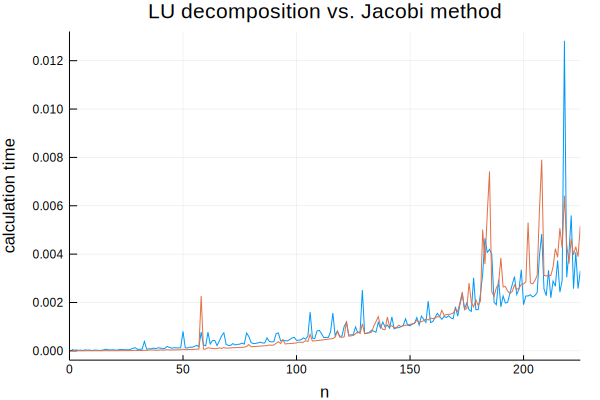

In [6]:
# load custom module "LUmodule"
push!(LOAD_PATH, "./LUmodule/src")
using LUmodule

gr(title = "LU decomposition vs. Jacobi method",
    xlabel = "n",
    ylabel = "calculation time")


# A matrix
function amtx(n, a)
    mtx = Array(SymTridiagonal(fill(1., n), fill(a, n-1)))
    mtx[1,n] = mtx[n,1] = a
    return mtx
end


# b vector
function bvec(n)
    vec = zeros(n,1)
    vec[1] = 1
    vec[n] = -1
    return vec
end


# main
function main()
    maxn = 225
    jacobit = []
    lut = []
    anim = @animate for n = 1:maxn
        A1 = amtx(n, -1/4)
        b = bvec(n)
        push!(jacobit, @elapsed jacobi(A1, rand(n), b))
        push!(lut, @elapsed lusolve!(A1, b))
        plot(jacobit, lab="Jacobi")
        plot!(lut, lab="LU")
        xlims!(0, maxn)
    end
    gif(anim, "img/2-3_1.gif", fps = 20)
    savefig("img/2-3_1.png")
    plot!()
end


main()